# Homework (15 pts) - Classification

In [1]:
# Questions are based on the mouse cortex protein expression level dataset used in lecture.
# The Data_Cortex_Nuclear.csv file is available in the same folder as this notebook
# or at https://www.kaggle.com/ruslankl/mice-protein-expression
import pandas as pd
mice = pd.read_csv('Data_Cortex_Nuclear.csv')
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


---
1. (3 pts) Remove mice/samples with missing measurements from the dataframe. Store the result in the mice variable for use with subsequent questions.

In [2]:
mice = mice.dropna()

---
2. (3 pts) Use both logistic regression and a random forest to classify the mice as either memantine or saline treated based on their protein expression profiles. Contrast the overall accuracy of the two classifiers on a withheld test set. You can ignore any warnings similar to those seen in the lecture for the purposes of this assignment, not that you should ignore these for a real analysis.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = mice.loc[:,'DYRK1A_N':'CaNA_N']
y = mice['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4)

lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_y_test_pred = lr.predict(X_test)
rf_y_test_pred = rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_y_test_pred)
rf_accuracy = accuracy_score(y_test, rf_y_test_pred)

accuracySummary = pd.DataFrame([[lr_accuracy, rf_accuracy]], columns=['Logistic Regression', 'Random Forest'], index=['Accuracy'])
accuracySummary

,Logistic Regression,Random Forest
Accuracy,0.904977,0.963801


---
3. (3 pts) For the two classifiers trained in #2 above, contrast their confusion matrices based on predictions for a withheld test set.

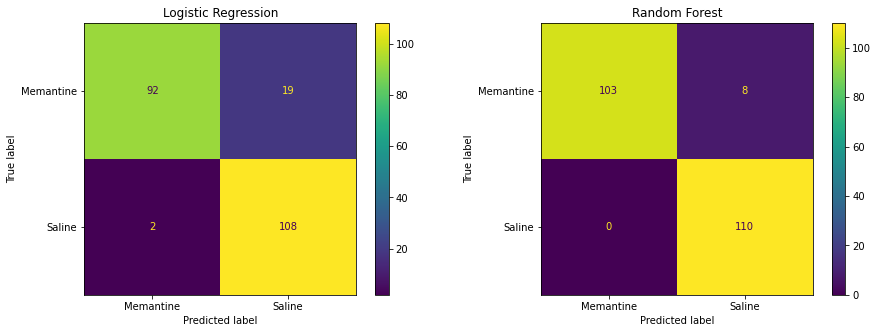

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lr_cm = confusion_matrix(y_test, lr_y_test_pred)
rf_cm = confusion_matrix(y_test, rf_y_test_pred)

plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr.classes_)
cmd.plot(ax=ax)
plt.title('Logistic Regression')

ax = plt.subplot(1,2,2)
cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
cmd.plot(ax=ax)
plt.title('Random Forest');

---
4. (3 pts) For the two classifiers trained in #2 above, contrast their ROC curves based on predictions for Memantine treatment in withheld test set.

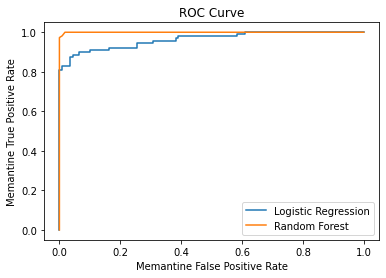

In [27]:
from sklearn.metrics import roc_curve
import numpy as np

lr_y_test_proba = lr.predict_proba(X_test)
rf_y_test_proba = rf.predict_proba(X_test)

i = np.where(lr.classes_ == "Memantine")[0]
fpr, tpr, thresholds = roc_curve(y_test, lr_y_test_proba[:,i], pos_label=lr.classes_[i])
plt.plot(fpr, tpr, label="Logistic Regression")

i = np.where(rf.classes_ == "Memantine")[0]
fpr, tpr, thresholds = roc_curve(y_test, rf_y_test_proba[:,i], pos_label=rf.classes_[i])
plt.plot(fpr, tpr, label="Random Forest")

plt.xlabel('Memantine False Positive Rate')
plt.ylabel('Memantine True Positive Rate')
plt.title('ROC Curve')
plt.legend();

---
5. (3 pts) Use a random forest to classify the mice into each of the 8 classes defined by genotype, fear conditioning and treatment based on their protein expression profiles. Repeat this classification 77 separate times, where on the ith time you will use only the first i proteins. For example, the 1st time you will only use expression of DYRK1A_N, the 2nd time you will use both DYRK1A_N and ITSN1_N as predictive features, the 3rd time DYRK1A_N, ITSN1_N and BDNF_N, etc. until the 77th time you will use all 77 proteins from DYRK1A_N to CaNA_N. Plot the accuracy of the classifier on a withheld test set as a function of the number of protein features used as predictors.

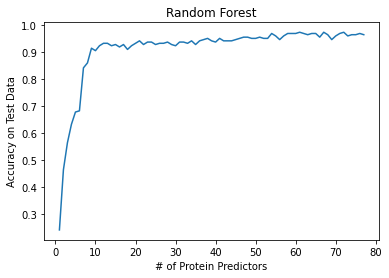

In [43]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']
y = mice['class']

# row indices for mice in training and testing sets
# we precompute this so we use the exact same partitioning of the mice for each model
rand_ind = np.arange(len(y))
np.random.shuffle(rand_ind)
ntest = int(len(y) * 0.4)
train_ind = rand_ind[:-ntest]
test_ind = rand_ind[-ntest:]

# since our target array is the same for each model we can split it now
# we have to split the features on a per model basis as they will be changing for each model
y_train = y.iloc[train_ind]
y_test = y.iloc[test_ind]

model = RandomForestClassifier(n_estimators=100)
accuracy = []
for i in range(77):
    # features for this model split into training and testing sets
    # (split must be the same as the target y data above)
    Xi = X.iloc[:,1:i+2]
    Xi_train = Xi.iloc[train_ind,:]
    Xi_test = Xi.iloc[test_ind,:]
    
    # train the model and evaluate accuracy on test set
    model.fit(Xi_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(Xi_test)))

plt.plot(range(1,78), accuracy)
plt.xlabel('# of Protein Predictors')
plt.ylabel('Accuracy on Test Data')
plt.title('Random Forest');